In [2]:
#A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the data
data = pd.read_csv("C:/Users/prava/Downloads/Sadhuko/SEM5/ML/cyberbullying_tweets.csv")

# Sample a smaller dataset for demonstration
sampled_data = data.sample(50, random_state=42)

# Encode the target variable
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(sampled_data['tweet_text'])
y = sampled_data['cyberbullying_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 2 2 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 1 0]
 [1 1 0 0 0 0]]

Classification Report:
                     precision    recall  f1-score   support

                age       0.00      0.00      0.00         0
          ethnicity       0.17      1.00      0.29         1
             gender       1.00      0.50      0.67         4
  not_cyberbullying       0.00      0.00      0.00         1
other_cyberbullying       1.00      0.50      0.67         2
           religion       0.00      0.00      0.00         2

           accuracy                           0.40        10
          macro avg       0.36      0.33      0.27        10
       weighted avg       0.62      0.40      0.43        10



C:\Users\prava\Downloads\Chettha\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prava\Downloads\Chettha\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prava\Downloads\Chettha\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [3]:
#A2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Mock data: true prices and predicted prices
np.random.seed(42)
true_prices = np.random.randint(100, 1000, size=50)  # True prices (between 100 and 1000)
predicted_prices = true_prices + np.random.normal(0, 50, size=50)  # Predicted prices with some noise

# Calculate MSE, RMSE, MAPE, and R2 score
mse = mean_squared_error(true_prices, predicted_prices)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((true_prices - predicted_prices) / true_prices)) * 100
r2 = r2_score(true_prices, predicted_prices)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R² Score: {r2}")


MSE: 2271.348271713166
RMSE: 47.65866418305454
MAPE: 9.681731837084186%
R² Score: 0.9657866128798226


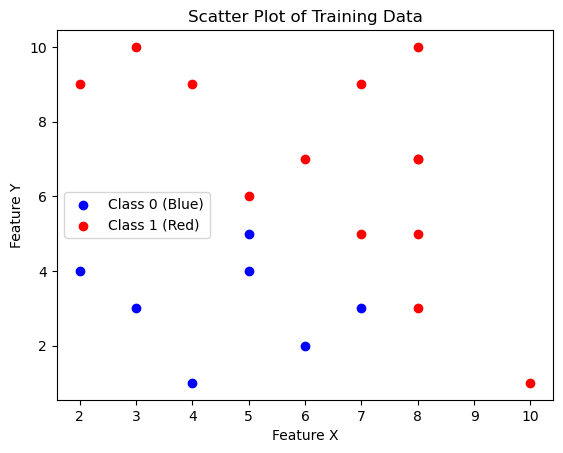

In [4]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 random data points for X and Y between 1 and 10
np.random.seed(42)
X = np.random.randint(1, 11, size=20)
Y = np.random.randint(1, 11, size=20)

# Assign classes based on the values of X and Y
classes = np.where(X + Y > 10, 1, 0)  # Simple rule for classifying: if X + Y > 10, class = 1 (Red), else class = 0 (Blue)

# Plot the data points with color coding based on class
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.title('Scatter Plot of Training Data')
plt.show()


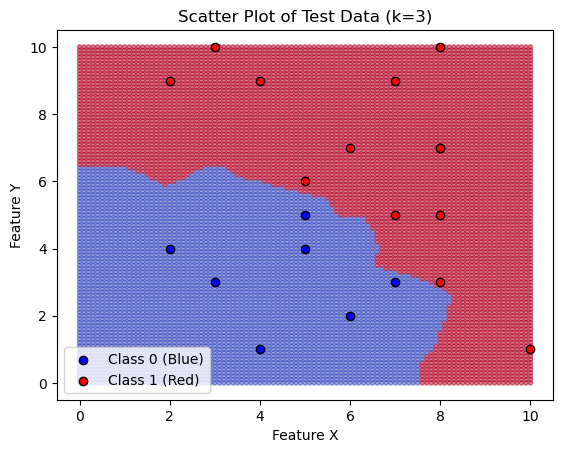

In [5]:
#A4
from sklearn.neighbors import KNeighborsClassifier

# Generate test data points with X and Y varying between 0 and 10 with increments of 0.1
test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_points = np.c_[test_X.ravel(), test_Y.ravel()]

# Train a kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
train_data = np.c_[X, Y]
knn.fit(train_data, classes)

# Predict the classes for the test points
predicted_classes = knn.predict(test_points)

# Plot the test points with predicted class colors
plt.scatter(test_X.ravel(), test_Y.ravel(), c=predicted_classes, cmap='coolwarm', alpha=0.5, marker='.')
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)', edgecolors='k')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)', edgecolors='k')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.title('Scatter Plot of Test Data (k=3)')
plt.show()


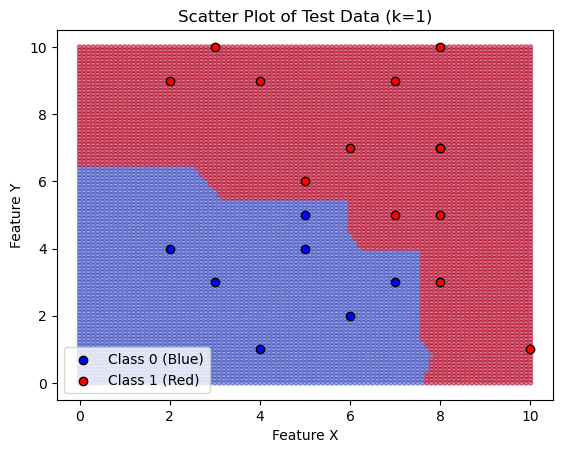

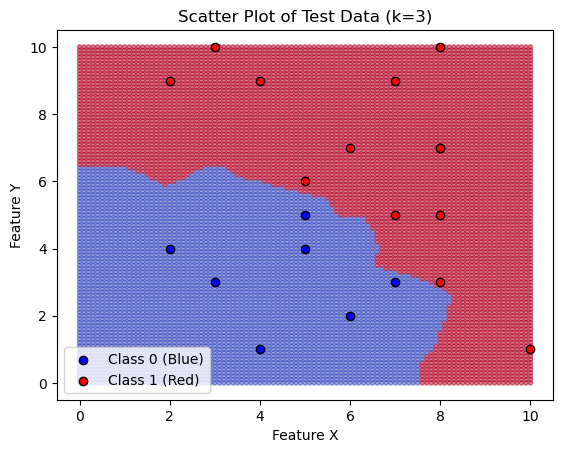

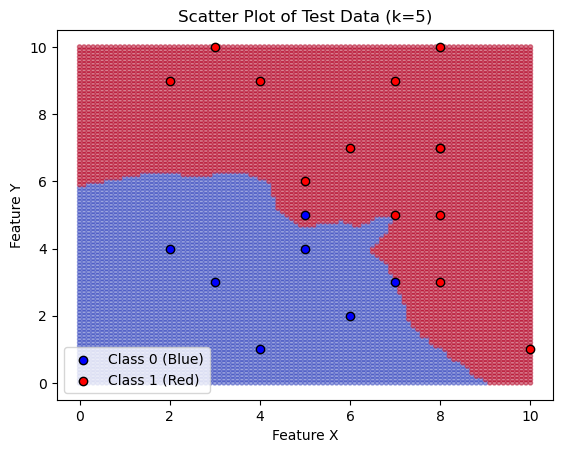

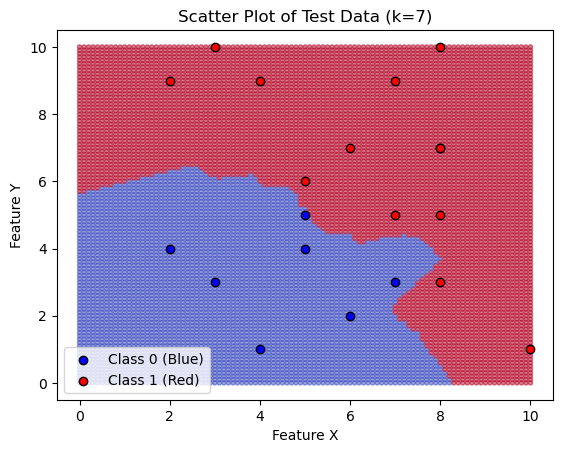

In [6]:
#A5
# Function to plot kNN classification results for different k values
def plot_knn_boundary(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes)
    predicted_classes = knn.predict(test_points)
    
    plt.scatter(test_X.ravel(), test_Y.ravel(), c=predicted_classes, cmap='coolwarm', alpha=0.5, marker='.')
    plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)', edgecolors='k')
    plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)', edgecolors='k')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    plt.title(f'Scatter Plot of Test Data (k={k})')
    plt.show()

# Plot for different k values
for k in [1, 3, 5, 7]:
    plot_knn_boundary(k)


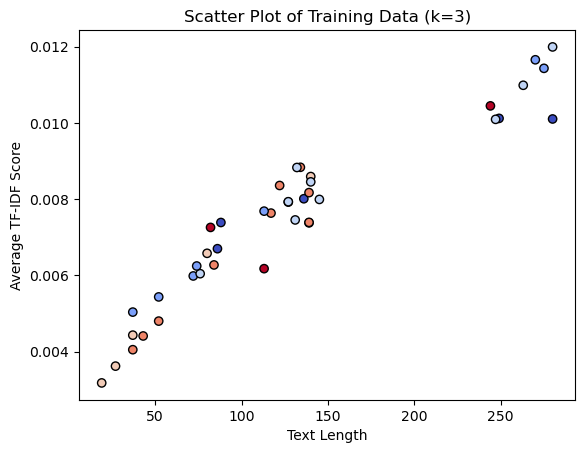

In [10]:
#A6
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Users/prava/Downloads/Sadhuko/SEM5/ML/cyberbullying_tweets.csv")

# Sample a smaller dataset for demonstration
sampled_data = data.sample(50, random_state=42)

# Feature X: Length of the tweet
sampled_data['text_length'] = sampled_data['tweet_text'].apply(len)

# Feature Y: Average TF-IDF score
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_scores = vectorizer.fit_transform(sampled_data['tweet_text']).toarray()
sampled_data['avg_tfidf'] = tfidf_scores.mean(axis=1)

# Extracting the new features
X_feat = sampled_data[['text_length', 'avg_tfidf']].values
y_feat = sampled_data['cyberbullying_type']

# Splitting the data
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feat, y_feat, test_size=0.2, random_state=42)

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_feat, y_train_feat)

# Predict on the test set
y_pred_feat = knn.predict(X_test_feat)

# Plotting results with k=3
plt.scatter(X_train_feat[:, 0], X_train_feat[:, 1], c=[{'age':0, 'ethnicity':1, 'gender':2, 'not_cyberbullying':3, 'other_cyberbullying':4, 'religion':5}[label] for label in y_train_feat], cmap='coolwarm', edgecolors='k')
plt.xlabel('Text Length')
plt.ylabel('Average TF-IDF Score')
plt.title('Scatter Plot of Training Data (k=3)')
plt.show()


C:\Users\prava\Downloads\Chettha\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prava\Downloads\Chettha\New folder\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prava\Downloads\Chettha\New folder\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prava\Downloads\Chettha\New folder\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\prava\Downloads\Chettha\New fo

The best value of k is: 8


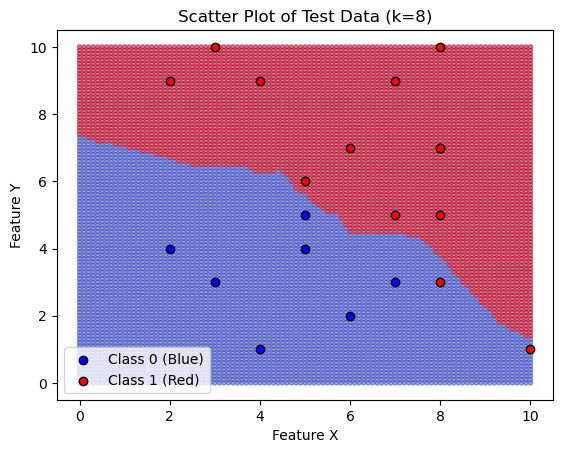

In [7]:
#A7
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for k
param_grid = {'n_neighbors': np.arange(1, 20)}

# Use GridSearchCV to find the best k value
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(train_data, classes)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value of k is: {best_k}")

# Plot with the best k value
plot_knn_boundary(best_k)
